In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [5]:
#Checking Description of the dataset
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
print(diabetes.target)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [7]:
dataset = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
dataset['Diabetes Progress'] = diabetes.target
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                442 non-null    float64
 1   sex                442 non-null    float64
 2   bmi                442 non-null    float64
 3   bp                 442 non-null    float64
 4   s1                 442 non-null    float64
 5   s2                 442 non-null    float64
 6   s3                 442 non-null    float64
 7   s4                 442 non-null    float64
 8   s5                 442 non-null    float64
 9   s6                 442 non-null    float64
 10  Diabetes Progress  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [9]:
#summarising stats
dataset.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progress
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [10]:
dataset.isnull().sum()

age                  0
sex                  0
bmi                  0
bp                   0
s1                   0
s2                   0
s3                   0
s4                   0
s5                   0
s6                   0
Diabetes Progress    0
dtype: int64

In [11]:
#Checking for Correlation
#checking multicolinearity. (When features are highly correlated with each other, it can be challenging to determine the individual effect of each
#feature on the target variable. This can make the coefficient estimates unstable and less interpretable.)
#using pearson correlation here. ( means values varies between -1 to +1 where, -1 is negatively correlated and positively correlated otherwise)
dataset.corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes Progress
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Text(0, 0.5, 'Blood Sugar Level')

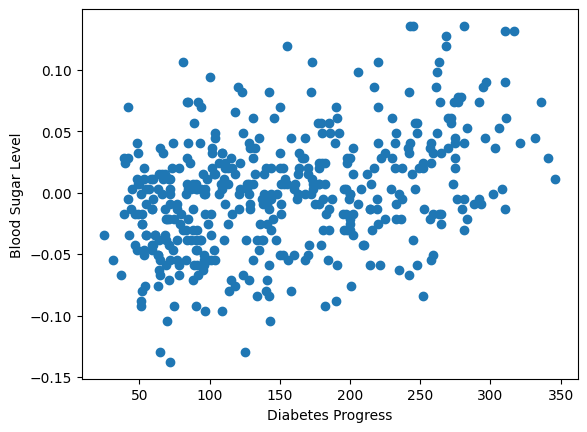

In [12]:
plt.scatter(dataset['Diabetes Progress'], dataset['s6'])
plt.xlabel("Diabetes Progress")
plt.ylabel("Blood Sugar Level")

<Axes: xlabel='s6', ylabel='Diabetes Progress'>

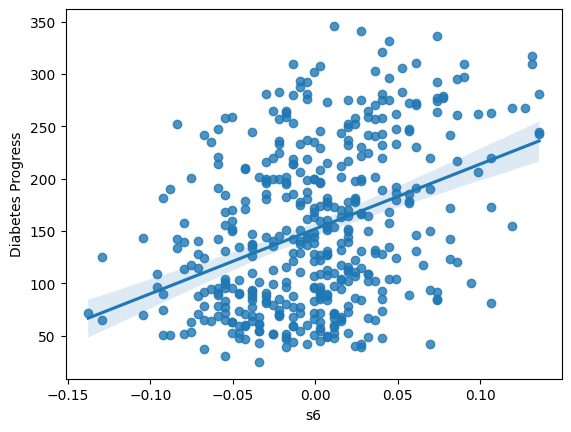

In [13]:
import seaborn as sns
sns.regplot(x = 's6', y = 'Diabetes Progress', data = dataset)

Text(0, 0.5, 'Diabetes Progress ')

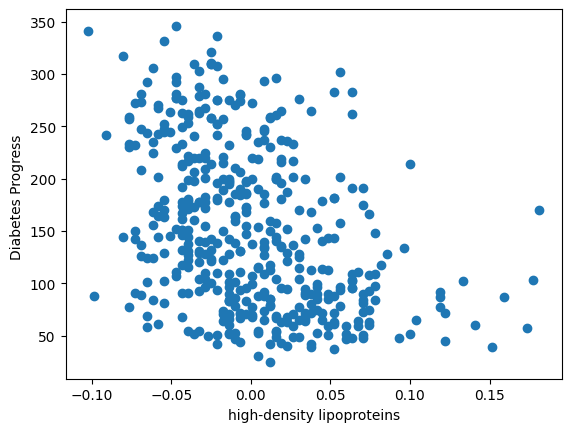

In [14]:
plt.scatter(dataset['s3'], dataset['Diabetes Progress'])
plt.xlabel("high-density lipoproteins")
plt.ylabel("Diabetes Progress ")

<Axes: xlabel='s3', ylabel='Diabetes Progress'>

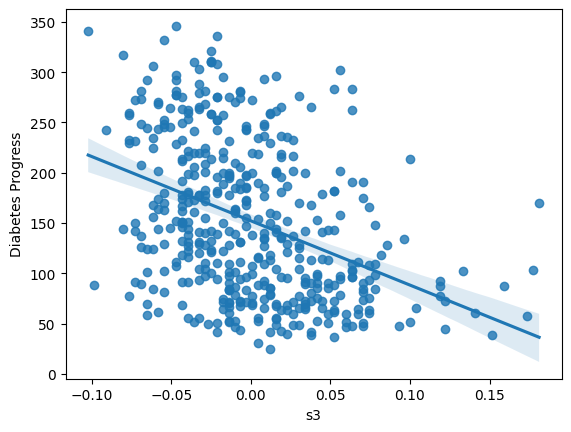

In [15]:
import seaborn as sns
sns.regplot(x = 's3', y = 'Diabetes Progress', data = dataset)

In [16]:
# Independent and Dependent Features

X = dataset.iloc[:, :-1] # takes all input features except target variable
y = dataset.iloc[:, -1]
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Diabetes Progress, dtype: float64

In [17]:
#Train Test Flip
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [19]:
# Standardizing the scaling of dataset ( So that GLobal Minimum can be achieved easily )
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
#training model
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # didnt use Fit_transform because we dont want model to be aware of test data!

In [37]:
import pickle5
pickle5.dump(scaler, open('scaling.pkl', 'wb'))

In [21]:
from sklearn.linear_model import LinearRegression
regress =  LinearRegression()
regress.fit(X_train, y_train)

LinearRegression()

In [22]:
#Printing Coeff and intercept
print(regress.coef_) #gives coeff of all the number of independent features

[  1.35246724 -12.45426893  26.21004615  18.61443344 -43.26039442
  24.2556288    5.73862584  13.96342685  31.57521526   1.98339354]


In [23]:
print(regress.intercept_)

153.90291262135923


In [24]:
#parameters on which model is trained
regress.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [25]:
#prediction with x_test
reg_pred = regress.predict(X_test)

In [26]:
reg_pred

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

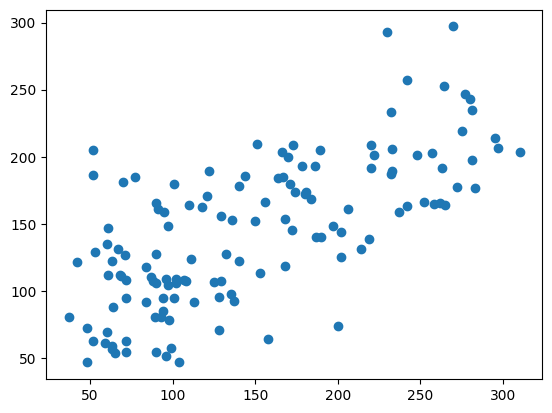

In [27]:
#plotting Scatter plot for the prediction
plt.scatter(y_test, reg_pred)

In [28]:
#finding error
Residuals = y_test - reg_pred

In [29]:
Residuals

287     80.530300
211   -111.100523
72      76.655991
321    -62.759773
73     -12.883053
          ...    
238     54.002213
26      44.898996
7      -59.288768
401     12.191330
108     -1.218705
Name: Diabetes Progress, Length: 133, dtype: float64

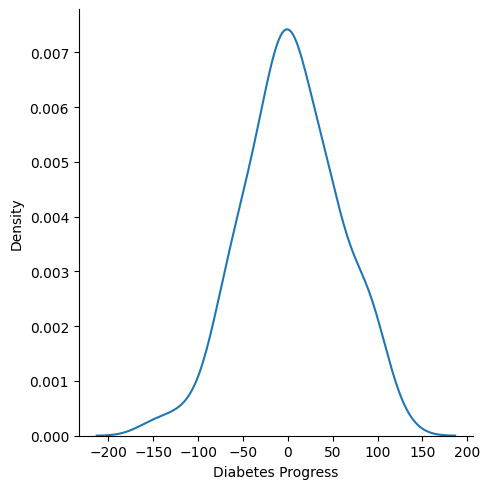

In [30]:
#plotting errors
sns.displot(Residuals, kind ='kde')

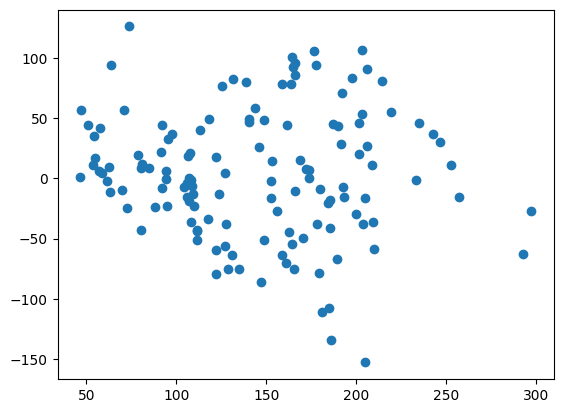

In [31]:
#plotting prediction and residual scatter plot
plt.scatter(reg_pred, Residuals)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print ("MAE",mean_absolute_error(y_test, reg_pred))
print ("MSE",mean_squared_error(y_test, reg_pred))
print ("RMSE",np.sqrt(mean_squared_error(y_test, reg_pred)))

MAE 41.91937845679274
MSE 2821.750981001311
RMSE 53.120156070942706


In [33]:
# calculating R^2 and adjusted R^2
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)  #more it is towards one the more better it is

0.4772897164322617


In [34]:
1 - (1-score)*(len(y_test-1))/(len(y_test)-X_test.shape[1]-1)

0.4301601007007443

In [35]:
#New Data prediction
diabetes.data[0].reshape(1, -1)  #actual shape of it was (10, )

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613]])

In [36]:
#transformation of new data
df = scaler.transform(diabetes.data[0].reshape(1, -1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
regress.predict(df)

array([209.68990406])

# PICKLING


In [ ]:
#Pickling model
import pickle5

In [ ]:
pickle5.dump(regress,open("/content/drive/MyDrive/ML_PROJECTS/regressmodel.pkl",'wb'))

In [ ]:
pickled_model = pickle5.load(open("/content/drive/MyDrive/ML_PROJECTS/regressmodel.pkl", 'rb'))

In [ ]:
pickled_model.predict(df)

array([209.68990406])